In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# Aux. function that will produce as many line plots as a list of columns that we give it
def multi_line_plot(col_list, data_df, figure_size=(13,15)):
    i=1
    plt.figure(figsize=figure_size)
    #plt.subplots_adjust(bottom=1, top=2)
    for col in col_list:
        plt.subplot(len(cols_to_plot), 1, i)
        sns.lineplot(data=data_df.iloc[:, col])
        plt.title(data_df.columns[col], loc="center")
        i += 1
    plt.tight_layout()
    plt.show()

# Tourist Arrivals in Italy

In [3]:
ita_tourist_df = pd.read_csv("../datasets/Eso_data/ita_tourist_data.csv", index_col=[0], parse_dates=True)
ita_tourist_df.head()

,Country,Arrivals,Avg_days_permanence
TIME,,,
2016-01-01,Italia,9528896.0,4.7
2016-02-01,Italia,9701444.0,4.7
2016-03-01,Italia,9638154.0,4.0
2016-04-01,Italia,9594564.0,3.5
2016-05-01,Italia,10773628.0,4.4


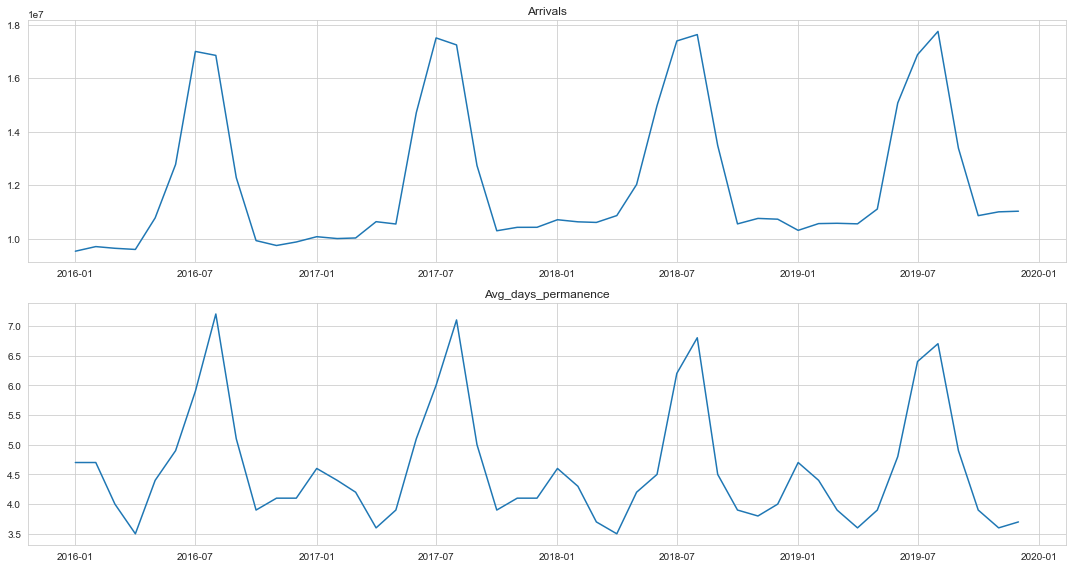

In [4]:
cols_to_plot = [1,2] 
multi_line_plot(cols_to_plot, ita_tourist_df, figure_size=(15,8))

# Weather Data

In [5]:
milan_weather_df = pd.read_csv("../datasets/Eso_data/weather/milano_weather_data.csv", index_col=[1], parse_dates=True)
turin_weather_df = pd.read_csv("../datasets/Eso_data/weather/torino_weather_data.csv", index_col=[1], parse_dates=True)
rome_weather_df = pd.read_csv("../datasets/Eso_data/weather/roma_weather_data.csv", index_col=[1], parse_dates=True)

# Columns we wish to plot
cols_to_plot = [1,2,3,5,7,12] 

## Milan

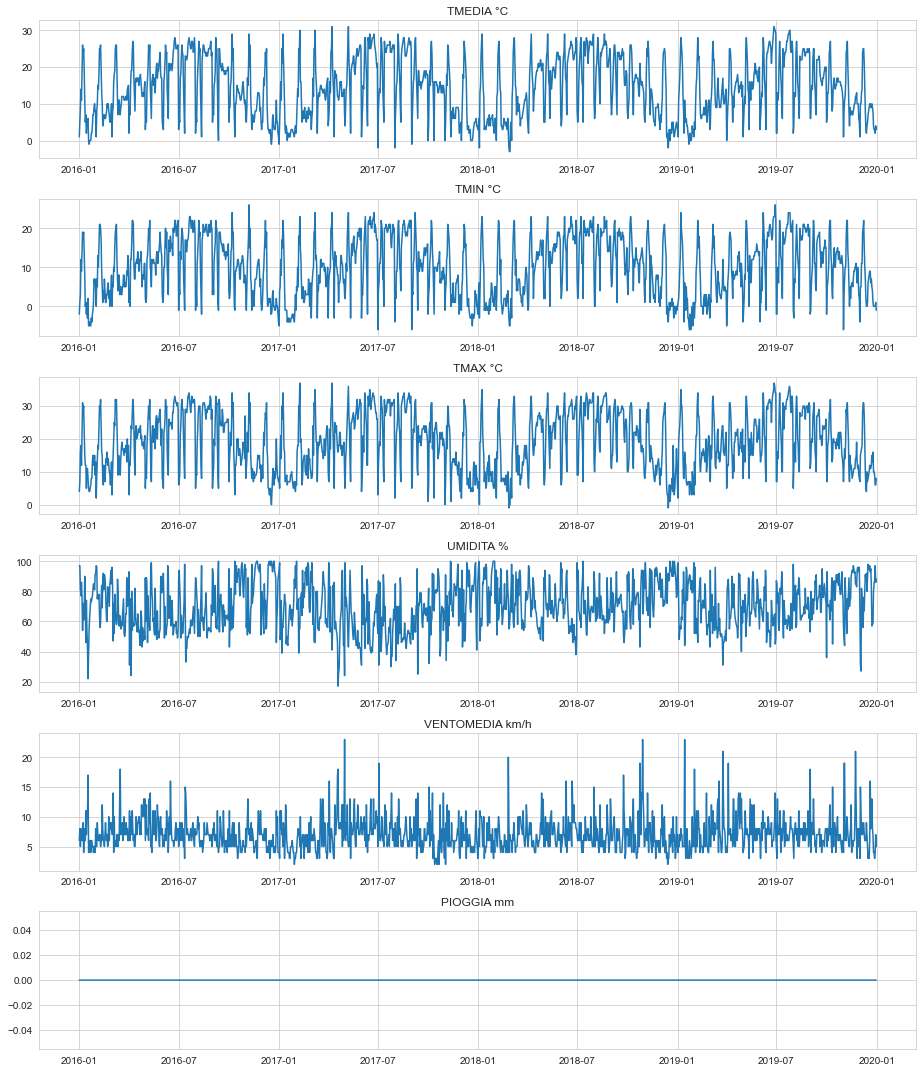

In [6]:
multi_line_plot(cols_to_plot, milan_weather_df)

## Turin

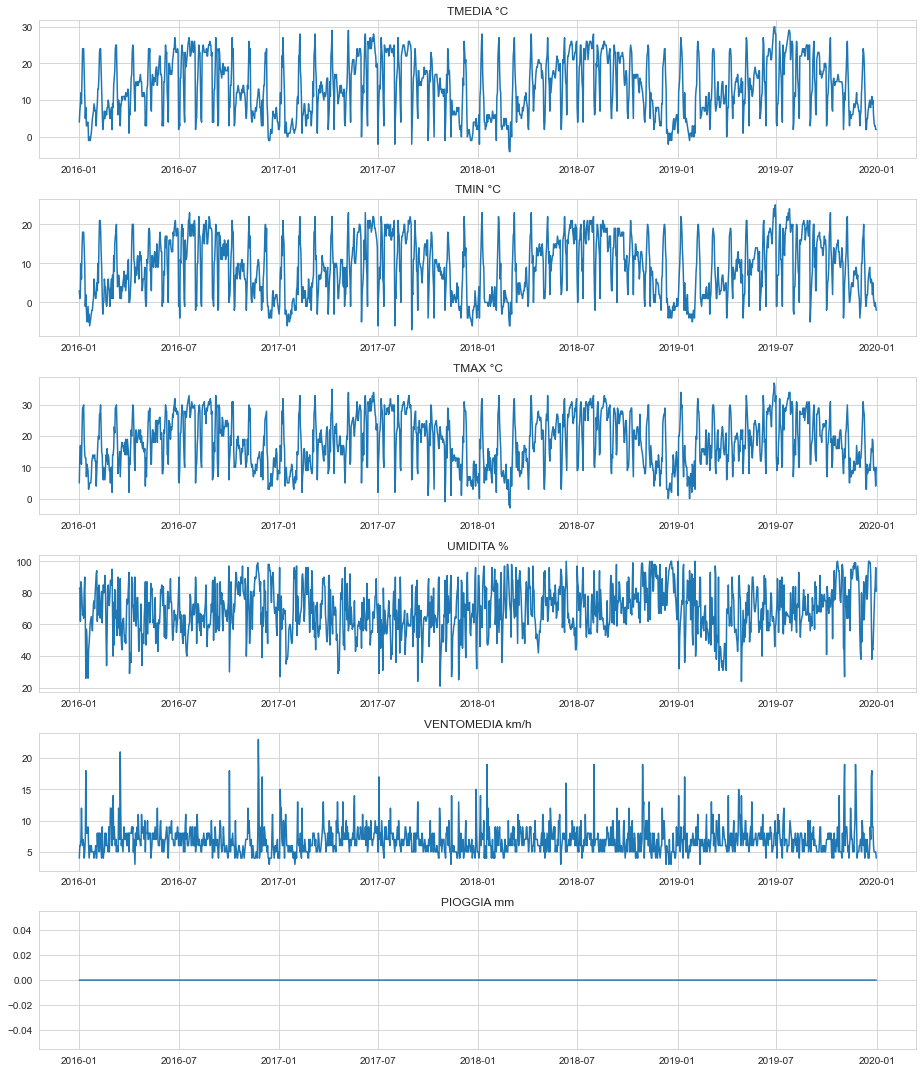

In [7]:
multi_line_plot(cols_to_plot, turin_weather_df)

## Rome

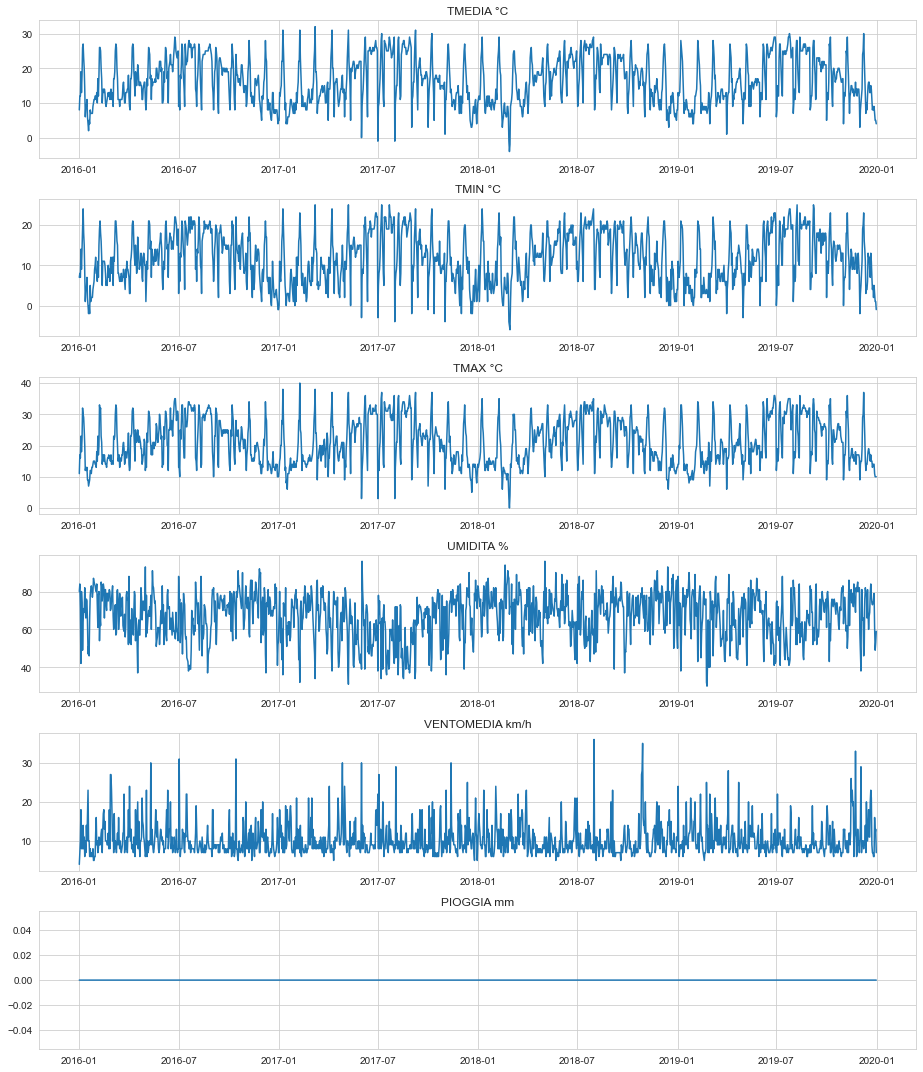

In [8]:
multi_line_plot(cols_to_plot, rome_weather_df)

# Population Data

In [9]:
milan_pop_df = pd.read_csv("../datasets/Eso_data/population/milano_population_data.csv", index_col=[1], parse_dates=True)
turin_pop_df = pd.read_csv("../datasets/Eso_data/population/torino_population_data.csv", index_col=[1], parse_dates=True)
rome_pop_df = pd.read_csv("../datasets/Eso_data/population/roma_population_data.csv", index_col=[1], parse_dates=True)
milan_pop_df.head()
# Columns we wish to plot
#cols_to_plot = [1,2,3,5,7,12] 

,Unnamed: 0,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
ITTER107,,,,,,,,,,,,,,,
ITC45,138,Milano,JAN,popolazione al 1º gennaio,1,maschi,Y0,0,1,nubile/celibe,2019,2019,12726,p,dato provvisorio
ITC45,139,Milano,JAN,popolazione al 1º gennaio,1,maschi,Y0,0,99,totale,2019,2019,12726,p,dato provvisorio
ITC45,140,Milano,JAN,popolazione al 1º gennaio,2,femmine,Y0,0,1,nubile/celibe,2019,2019,12159,p,dato provvisorio
ITC45,141,Milano,JAN,popolazione al 1º gennaio,2,femmine,Y0,0,99,totale,2019,2019,12159,p,dato provvisorio
ITC45,142,Milano,JAN,popolazione al 1º gennaio,9,totale,Y0,0,1,nubile/celibe,2019,2019,24885,p,dato provvisorio


The population data is not as well structured as the weather or tourist data. There is a lot we can do here, it really depends on the type of exploratory analysis one wants to make. In this case I will be looking at the total numbers of the female population for each region and then also visualise them separately by marital status. Also the population data provided here is for 2019 measured as "popolazione al 1º gennaio" so there is not real serial temporal element to this data.

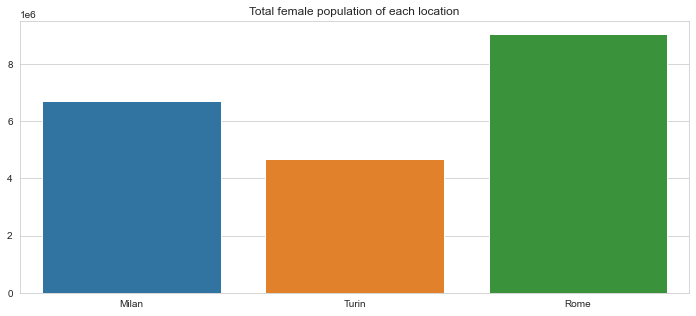

In [10]:
locations = ["Milan", "Turin", "Rome"]
milan_total_females = milan_pop_df[milan_pop_df["Sesso"]=="femmine"]["Value"].values.sum()
turin_total_females = turin_pop_df[turin_pop_df["Sesso"]=="femmine"]["Value"].values.sum()
rome_total_females = rome_pop_df[rome_pop_df["Sesso"]=="femmine"]["Value"].values.sum()

# Plot the total female population by location
plt.figure(figsize=(12,5))
sns.barplot(locations, [milan_total_females, turin_total_females, rome_total_females])
plt.title("Total female population of each location")
plt.show()

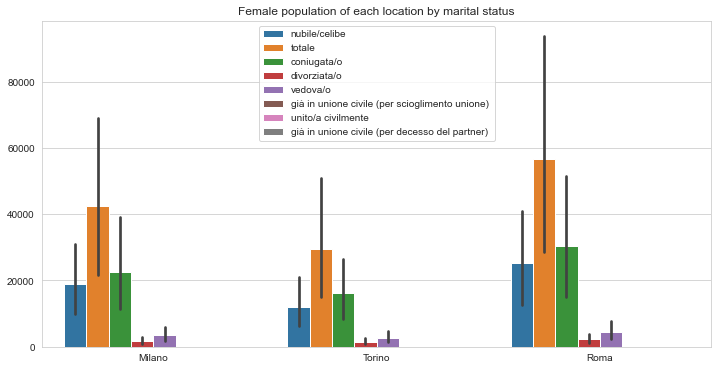

In [11]:
all_loc_pops = milan_pop_df.append(turin_pop_df)
all_loc_pops = all_loc_pops.append(rome_pop_df)
plt.figure(figsize=(12,6))
sns.barplot(all_loc_pops["Territorio"].values, all_loc_pops["Value"].values, hue=all_loc_pops["Stato civile"].values)
plt.title("Female population of each location by marital status")
plt.show()

# Pollution data (external) which I worked with


In [12]:
# I exported an already pre-processed and clean version of the csv so it would be easier to use in future cases
# (like this one)
pollution_df = pd.read_csv("../datasets/cleanPollutionData.csv", index_col=[0], parse_dates=True)
pollution_df.head(10)

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0


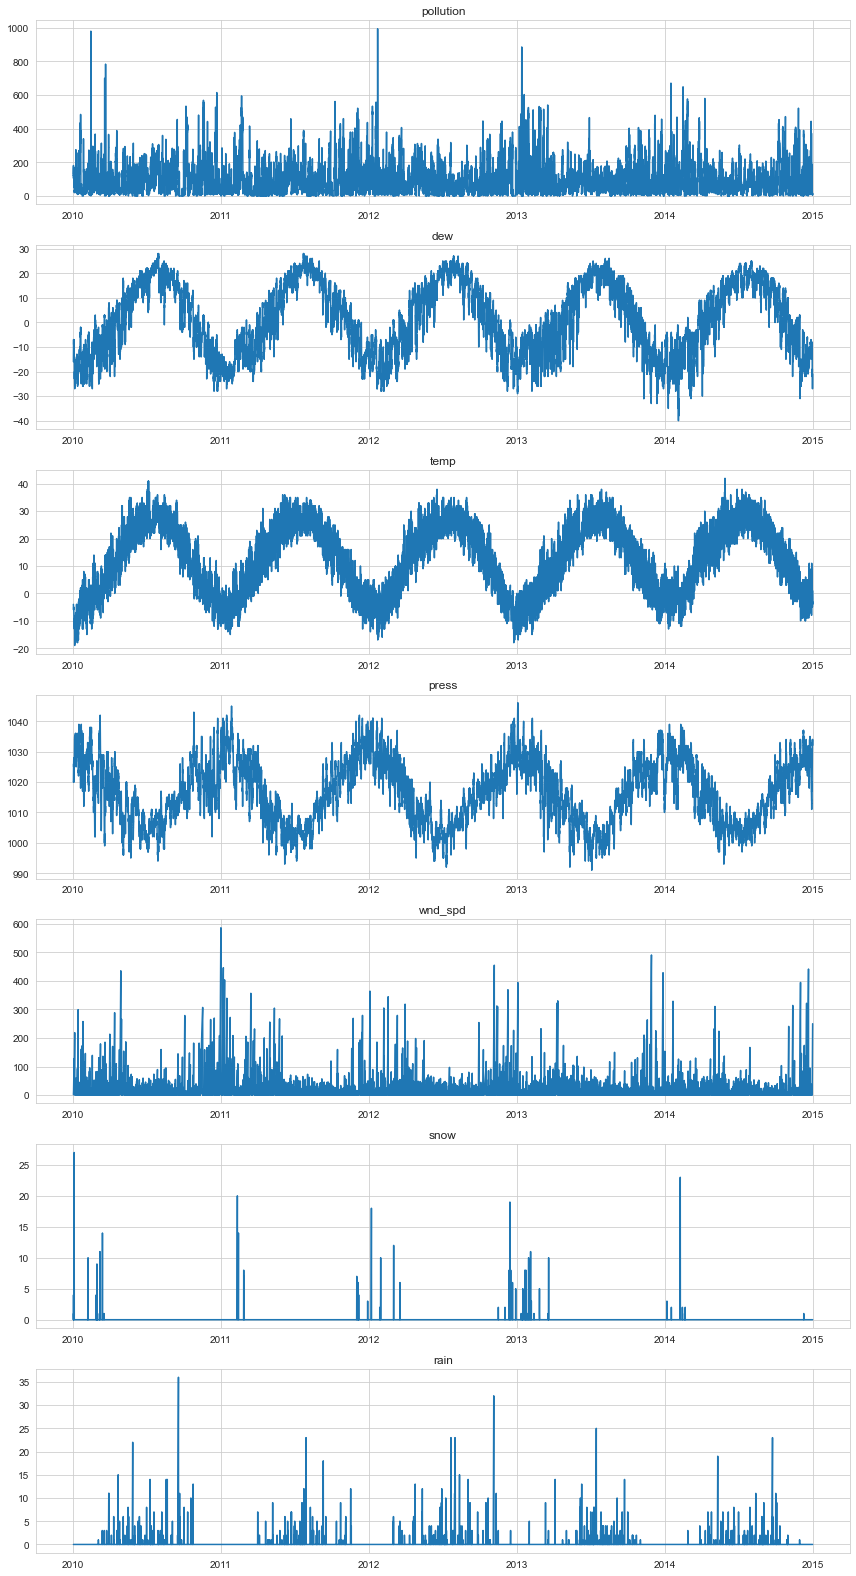

In [13]:
cols_to_plot = [0,1,2,3,5,6,7] # I won't be plotting wind_dir since it's categorical
multi_line_plot(cols_to_plot, pollution_df, figure_size=(12,22))